In [1]:
#Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform

In [2]:
os.chdir("C:\manideep\edwisor\Project-1")
os.getcwd()

'C:\\manideep\\edwisor\\Project-1'

In [3]:
#Loading data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")



In [4]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_data.isnull().sum())
missing_val1 = pd.DataFrame(test_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()
missing_val1 = missing_val1.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'percent'})
missing_val1 = missing_val1.rename(columns = {'index': 'Variables', 0: 'percent'})

#Calculate percentage
missing_val['percent'] = (missing_val['percent']/len(train_data))*100
missing_val1['percent'] = (missing_val1['percent']/len(test_data))*100



In [6]:
#Excluding the ID_code and target columns
cnames = train_data.iloc[:,2:203]
cnames1 = test_data.iloc[:,2:202]

In [7]:
#Outlier Analysis for train data
for i in cnames:
      print(i)
      q75, q25 = np.percentile(train_data.loc[:,i], [75 ,25])
      iqr = q75 - q25

      min = q25 - (iqr*1.5)
      max = q75 + (iqr*1.5)
      print(min)
      print(max)
    
      train_data = train_data.drop(train_data[train_data.loc[:,i] < min].index)
      train_data = train_data.drop(train_data[train_data.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888612499999997
10.507087499999999
var_2
3.031512499999998
18.207612500000003
var_3
0.6484500000000004
12.929649999999999
var_4
6.3163750000000025
15.827774999999997
var_5
-29.38955
19.11405
var_6
2.9145000000000008
7.856099999999998
var_7
6.206024999999997
26.839825000000005
var_8
-10.2005625
10.8209375
var_9
3.6705499999999995
11.53255
var_10
-15.5628
16.3516
var_11
-20.0544
13.399200000000002
var_12
13.488700000000001
14.569499999999998
var_13
-5.730549999999998
23.077849999999998
var_14
0.5459000000000014
14.504299999999999
var_15
13.345000000000002
15.792199999999998
var_16
2.048700000000002
16.4591
var_17
-24.981524999999998
13.696475
var_18
-8.5675
38.7573
var_19
-11.95475
36.660849999999996
var_20
-5.251424999999999
31.758375
var_21
-5.760100000000001
40.4015
var_22
-3.984325000000001
12.459875
var_23
1.4802499999999994
4.557450000000001
var_24
-1.1814875000000011
22.2772125
var_25
12.845600000000001
14.4744
var_26
-20.6719375
12.258

In [8]:
#Outlier Analysis for test data
for i in cnames1:
      print(i)
      q75, q25 = np.percentile(test_data.loc[:,i], [75 ,25])
      iqr = q75 - q25

      min = q25 - (iqr*1.5)
      max = q75 + (iqr*1.5)
      print(min)
      print(max)
    
      test_data = test_data.drop(test_data[test_data.loc[:,i] < min].index)
      test_data = test_data.drop(test_data[test_data.loc[:,i] > max].index)

var_1
-13.7654125
10.4086875
var_2
3.0963499999999984
18.13435
var_3
0.584550000000001
12.973749999999999
var_4
6.3477250000000005
15.796724999999999
var_5
-29.417387499999997
19.158912499999996
var_6
2.9227999999999996
7.8556
var_7
6.191499999999997
26.837900000000005
var_8
-10.154912500000002
10.7807875
var_9
3.6818
11.526599999999998
var_10
-15.608600000000003
16.345000000000002
var_11
-20.051849999999998
13.36375
var_12
13.483149999999995
14.570750000000004
var_13
-5.725812500000002
23.070287500000003
var_14
0.5181999999999984
14.523000000000001
var_15
13.343149999999998
15.794750000000004
var_16
2.0824500000000015
16.40685
var_17
-25.0272
13.7176
var_18
-8.423449999999999
38.67295
var_19
-11.866837499999997
36.632662499999995
var_20
-5.398099999999998
31.905099999999997
var_21
-5.754049999999999
40.29675
var_22
-3.968800000000001
12.423200000000001
var_23
1.47405
4.56405
var_24
-1.1789125
22.2571875
var_25
12.84655
14.472549999999998
var_26
-20.668300000000002
12.401299999999999
v

In [9]:
#Correlation plot
train_corr = train_data.iloc[:,2:202]

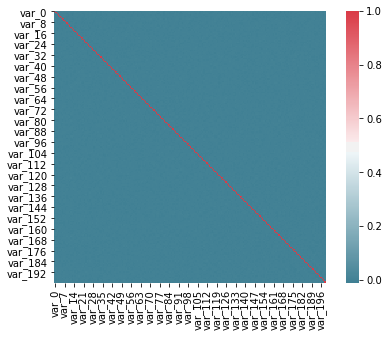

In [10]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = train_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

(array([  15.,   34.,   31.,   32.,   38.,   49.,   68.,   74.,   98.,
          97.,  125.,  168.,  209.,  262.,  242.,  332.,  346.,  458.,
         516.,  559.,  701.,  734.,  831.,  915., 1071., 1156., 1341.,
        1371., 1436., 1701., 1744., 1824., 1922., 2179., 2241., 2411.,
        2448., 2703., 2751., 2699., 2984., 2900., 2958., 3075., 3069.,
        3130., 3145., 3099., 3228., 3109., 3226., 3244., 3180., 3126.,
        3134., 3123., 3099., 3141., 2995., 3140., 2962., 3112., 3142.,
        3232., 3236., 3279., 3150., 3084., 3089., 3033., 2745., 2623.,
        2485., 2378., 2276., 2170., 2011., 1911., 1883., 1755., 1677.,
        1560., 1464., 1338., 1299., 1211., 1111., 1045.,  948.,  838.,
         791.,  744.,  651.,  669.,  706.,  627.,  555.,  545.,  481.,
         452.,  449.,  413.,  378.,  299.,  303.,  296.,  214.,  151.,
         111.,   74.,   54.,   26.]),
 array([2.917     , 2.96108125, 3.0051625 , 3.04924375, 3.093325  ,
        3.13740625, 3.1814875 , 3.22556875

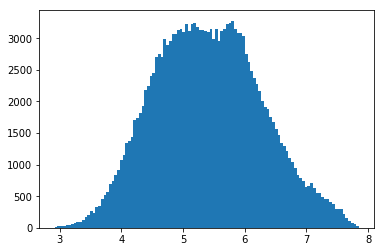

In [11]:
#Histogram 
%matplotlib inline  
plt.hist(train_data['var_6'], bins='auto')

In [12]:
#Standardizing train data
for i in cnames:
    print(i)
    train_data[i] = (train_data[i] - train_data[i].mean())/train_data[i].std()

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [13]:
#Standardizing test data
for i in cnames1:
    print(i)
    test_data[i] = (test_data[i] - test_data[i].mean())/test_data[i].std()

var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_138
var_

In [14]:
#Sampling
train_sample = train_data.sample(20000)

In [15]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
    #splitting data
    X = train_sample.values[:, 2:202]
      Y = train_sample.values[:,1]
      Y=Y.astype('int')
      X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)
    

In [30]:
#Logistic regression
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(X_train,y_train)

#
y_pred=log_reg.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3537,   62],
       [ 287,  114]], dtype=int64)

In [32]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.91275
Precision: 0.6477272727272727
Recall: 0.28428927680798005
AUC: 0.6335311346529481


In [34]:
#Note : before executing every algorithm run the splitting cell
#Decision tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Pred = C50_model.predict(X_test)

In [151]:
#Confusion matrix
cnf_matrix_dt = metrics.confusion_matrix(y_test, C50_Pred)
cnf_matrix_dt

array([[3232,  362],
       [ 337,   69]], dtype=int64)

In [152]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, C50_Pred))
print("Precision:",metrics.precision_score(y_test, C50_Pred))
print("Recall:",metrics.recall_score(y_test, C50_Pred))
print("AUC:", metrics.roc_auc_score(y_test, C50_Pred))

Accuracy: 0.82525
Precision: 0.16009280742459397
Recall: 0.16995073891625614
AUC: 0.5346136554904042


In [153]:
#Note : before executing every algorithm run the splitting cell
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [154]:
RF_Pred = RF_model.predict(X_test)

In [155]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, RF_Pred)
cnf_matrix_rf

array([[3594,    0],
       [ 405,    1]], dtype=int64)

In [156]:
print("Accuracy:",metrics.accuracy_score(y_test, RF_Pred))
print("Precision:",metrics.precision_score(y_test, RF_Pred))
print("Recall:",metrics.recall_score(y_test, RF_Pred))
print("AUC:", metrics.roc_auc_score(y_test, RF_Pred))

Accuracy: 0.89875
Precision: 1.0
Recall: 0.0024630541871921183
AUC: 0.5012315270935961


In [157]:
from sklearn.naive_bayes import GaussianNB
#Note : before executing every algorithm run the splitting cell
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [158]:
NB_Pred = NB_model.predict(X_test)

In [159]:
cnf_matrix_nb = metrics.confusion_matrix(y_test, NB_Pred)
cnf_matrix_nb

array([[3527,   67],
       [ 261,  145]], dtype=int64)

In [160]:
print("Accuracy:",metrics.accuracy_score(y_test, NB_Pred))
print("Precision:",metrics.precision_score(y_test, NB_Pred))
print("Recall:",metrics.recall_score(y_test, NB_Pred))
print("AUC:", metrics.roc_auc_score(y_test, NB_Pred))

Accuracy: 0.918
Precision: 0.6839622641509434
Recall: 0.35714285714285715
AUC: 0.6692503378646952


In [161]:
#drop the ID_code column
x_test = test_data.drop(['ID_code'],axis=1)

In [162]:
#Prediction on test data
pred = NB_model.predict(x_test)

In [164]:
x_test['target'] = pred

In [166]:
#Writing the output
x_test.to_csv("final_out.csv", index = False)